In [2]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=2f6a8a88121bd83c0c80b09cf7d0d7844ddd482ba7693c5fb686bc0bf92eb324
  Stored in directory: c:\users\youngmin\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=5a1fc39786c0f97b7e16a0dc9ecd2574cc2a7182585bb2e7db2dc39918211853
  Stored in directory: c:\users\youngmin\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [27]:
covid_data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
covid_data.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


<AxesSubplot:title={'center':'COVID-19 : Daily new cases'}, xlabel='date'>

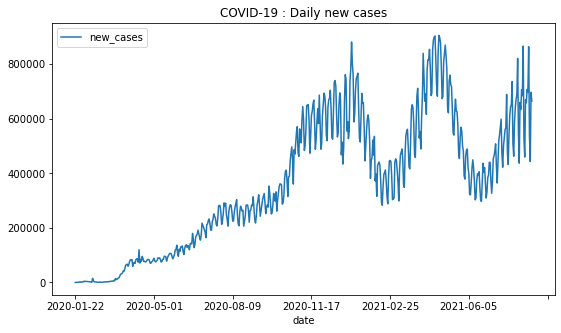

In [7]:
covid_data[(covid_data['location']=='World')].plot(x='date',y='new_cases',title = 'COVID-19 : Daily new cases', figsize = (9,5))
#plot 구성까지 한번에 앞에 covid_data를 함으로써 전체 plot에 해당되는 데이터를 바로 불러올 수 있다.

In [9]:
def covid_daily(ax):   # 
    covid_data[(covid_data['location']=='World')].plot(x='date',y='new_cases',title = 'COVID-19 : Daily new cases', figsize = (9,5), ax = ax)

In [10]:
from matplotlib import pyplot as plt

In [11]:
def pretty_plot (chart,save = False):
    fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (10,6))
    
    chart(ax)
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if save :
        fig = ax.get_figure()
        fig.savefig(f'{chart.__name__}.png')
        

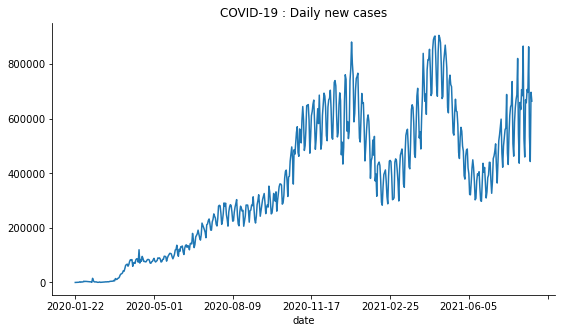

In [12]:
pretty_plot(covid_daily,save = True)

In [13]:
pip install sktime

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sktime.datasets import load_airline

<AxesSubplot:xlabel='Period'>

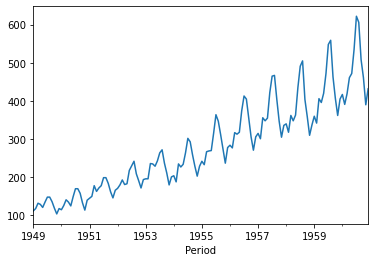

In [15]:
load_airline().plot()

In [16]:
white_noise_data = pd.DataFrame({"Z":np.random.normal(loc = 0.0, scale = 10.0, size = 500)})

def white_noise(ax = None):
    white_noise_data.plot(title = 'Gaussian white noise', figsize = (9,5),ax = ax)
    

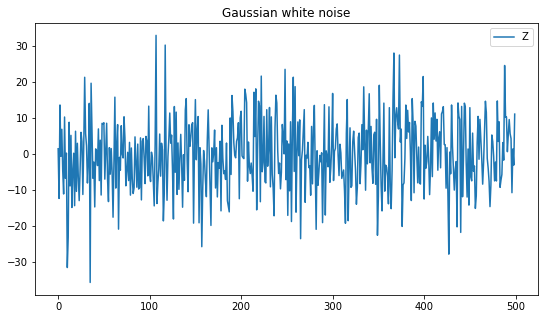

In [17]:
white_noise()

<AxesSubplot:>

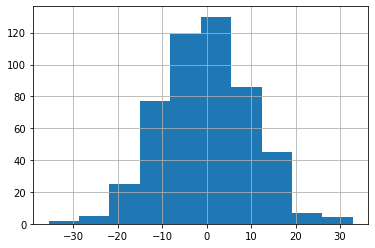

In [18]:
white_noise_data["Z"].hist()

In [23]:
!pip install pingouin

  Using cached pingouin-0.4.0-py3-none-any.whl
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pingouin as pg

In [25]:
pg.normality(white_noise_data["Z"])


,W,pval,normal
Z,0.998016,0.834487,True


In [1]:
pip install quandl

In [2]:
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
quandl_key = '{sSthqzqxWjSwDSsYRDui}'
quandl.ApiConfig.api_key = quandl_key 
df = quandl.get(dataset = 'WGC/GOLD_MONAVG_USD',start_date = '2000-01-01',end_date = '2001-12-31') 
df.renmae(columns = {'Value': 'price'}, inplace = True) 
df = df.resample('M').last()

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
Window_size = 12 df['rolling_mean'] = df.price.rolling(window = Window_size).mean() 
df['rolling_std']= df.price.rolling(window = Window_size).std()
df.plot(title = 'Gold Price')